In [7]:
#!/bin/env python

from __future__ import absolute_import, division, print_function, unicode_literals

import sys,os,os.path,time
sys.path.append(os.path.expanduser('/global/u1/r/rgupta2/.local/lib/python3.7/site-packages/'))

# export PYTHONPATH="${PYTHONPATH}:/usr/local/lib/python2.7/site-packages:/usr/lib/python2.7/site-packages"


import matplotlib.style
import matplotlib as mpl
mpl.use('Agg')
# mpl.style.use('seaborn')
mpl.rc('image', cmap='gray')
import matplotlib.pyplot as plt
	
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,10)


import time, re, sys, os
from tqdm import tqdm, trange
import cv2
import pandas as pd
import xarray as xr
from glob import glob
import numpy as np
from scipy import stats
# Install a pip package in the current Jupyter kernel
# !{sys.executable} -m pip install --user Pillow

from PIL import Image

import random
import os
import seaborn as sns

# import numpy as np
# import pandas as pd
# from matplotlib import pyplot as plt
# import tensorflow as tf
# from tensorflow import keras

# input_dir = '../input/movielens-preprocessing'
# model_dir = '../input/movielens-spiffy-model'
# model_path = os.path.join(model_dir, 'movie_svd_model_32.h5')

# model = keras.models.load_model(model_path)
# emb_layer = model.get_layer('movie_embedding')
# (w,) = emb_layer.get_weights()

# movies_path = os.path.join(input_dir, 'movie.csv')
# movies_df = pd.read_csv(movies_path, index_col=0)

[1, 1, 1, 2, 2, 2, 2]


In [2]:
import tensorflow as tf
print(tf.__version__)
tf.enable_eager_execution()

ModuleNotFoundError: No module named 'tensorflow'

In [3]:

discriminator_embedding_real_images = "/global/cscratch1/sd/rgupta2/backup/climate_stylegan/stored_outputs/logan_three_channel_norm/result/discriminator_embeddings/discriminator_267968_embedding_file_1.npy"
real_embeddings = np.load(discriminator_embedding_real_images)
# real_images are from 14600 samples across 5 years
real_embeddings = real_embeddings.reshape((14600, -1))[:1000]
print(real_embeddings.shape)


discriminator_embedding_generated_images =  "/global/cscratch1/sd/rgupta2/backup/climate_stylegan/stored_outputs/logan_three_channel_norm/result/discriminator_embeddings/fake_data_discriminator_267968_embedding_file_0.npy"
fake_embeddings = np.load(discriminator_embedding_generated_images)
fake_embeddings = fake_embeddings.reshape((1000, -1))
print(fake_embeddings.shape)


labels = np.asarray( [1]* real_embeddings.shape[0] + [0]* fake_embeddings.shape[0])
data = np.append(real_embeddings , fake_embeddings,axis = 0) 

print(labels.shape)
print(data.shape)


(1000, 8192)
(1000, 8192)
(2000,)
(2000, 8192)


In [4]:
from sklearn.manifold import TSNE



# The default of 1,000 iterations gives fine results, but I'm training for longer just to eke
# out some marginal improvements. NB: This takes almost an hour!
tsne = TSNE(random_state=1, n_iter=15000, metric="cosine")

tsne_data = tsne.fit_transform(data)


/global/homes/r/rgupta2/.conda/envs/tf-1.13/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


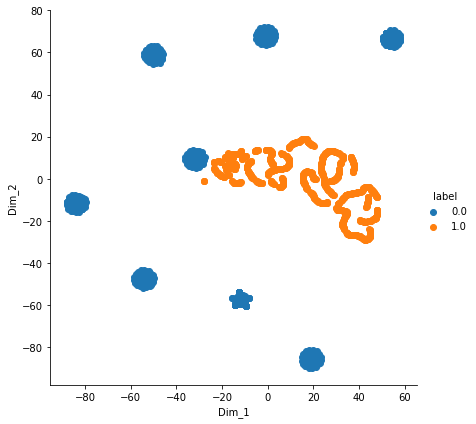

In [9]:


tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=( "Dim_1", "Dim_2", "label"))
# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, "Dim_1", "Dim_2").add_legend()
plt.show()

In [19]:
save_path = "/global/cscratch1/sd/rgupta2/backup/climate_stylegan/stored_outputs/logan_three_channel_norm/result/discriminator_embeddings/discriminator_267968_embeddings_tsne_.npy"
embs = np.load(save_path)
print(embs.shape)

(14600, 2)


In [9]:
data = embs

save_path = "/global/cscratch1/sd/rgupta2/backup/climate_stylegan/stored_outputs/logan_three_channel_norm/result/discriminator_embeddings/discriminator_267968_embeddings_tsne_.npy"

np.save(save_path, data)


No handles with labels found to put in legend.


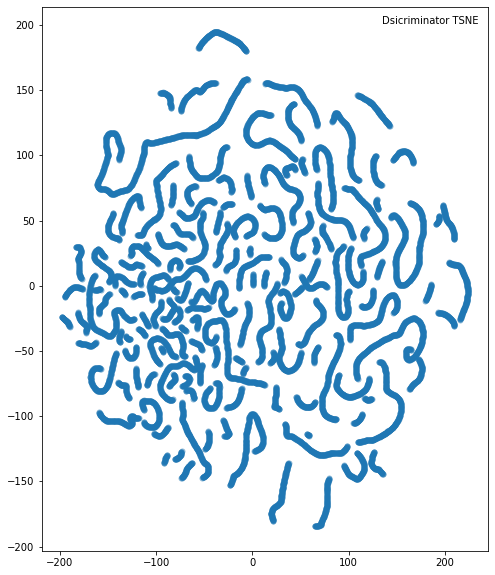

In [17]:
fig, ax = plt.subplots()
# Make points translucent so we can visually identify regions with a high density of overlapping points
ax.scatter(embs[:,0], embs[:,1], cmap='viridis', linewidth=0, alpha=0.5, palette=sns.color_palette("hls", 10),)

ax.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Dsicriminator TSNE')
#  14000 : 1000 
#  potentially dead regions (manifold discrete with various modes)

In [ ]:
#  crop images to 64 x 64  (out of 512 x 512)
#  1 x 1 pixel corresponds to 25 km^2